<a href="https://colab.research.google.com/github/LeahDiskin/DataProject/blob/main/BestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [4]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np

In [ ]:
# load train and test dataset
def load_dataset():
  from google.colab import drive
  drive.mount('/content/drive')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:

  
loaded_data = np.load('/content/drive/MyDrive/Data Project/data.npz')
x_train=loaded_data['x_train']
x_validation=loaded_data['x_validation']
x_test=loaded_data['x_test']
y_train=loaded_data['y_train']
y_test=loaded_data['y_test']
y_validation=loaded_data['y_validation']
num_classes =15
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_validation = to_categorical(y_validation)
 

In [10]:
x_test.shape

(15000, 32, 32, 3)

In [11]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_validation = x_validation.astype('float32')

x_train /= 255
x_test /= 255
x_validation/=255



In [12]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(15, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [13]:
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')


In [ ]:
# load dataset
# x_train,y_train,x_validation,y_validation,x_test,y_test = load_dataset()


Mounted at /content/drive


In [ ]:
# prepare pixel data
# x_train,y_train,x_validation,y_validation,x_test,y_test = prep_pixels(x_train,y_train,x_validation,y_validation,x_test,y_test)


In [14]:
# define model
model = define_model()


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [15]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)


In [16]:
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=32)


In [17]:
# fit model
steps = int(x_train.shape[0] / 32)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=250, validation_data=(x_validation,y_validation), verbose=1)


Epoch 1/250


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


1406/1406 [==============================] - 45s 23ms/step - loss: 2.4111 - accuracy: 0.2546 - val_loss: 1.7727 - val_accuracy: 0.4152
Epoch 2/250
1406/1406 [==============================] - 29s 20ms/step - loss: 1.9071 - accuracy: 0.3623 - val_loss: 1.6414 - val_accuracy: 0.4565
Epoch 3/250
1406/1406 [==============================] - 30s 21ms/step - loss: 1.7770 - accuracy: 0.4104 - val_loss: 1.6042 - val_accuracy: 0.4645
Epoch 4/250
1406/1406 [==============================] - 30s 21ms/step - loss: 1.6874 - accuracy: 0.4395 - val_loss: 1.5877 - val_accuracy: 0.4688
Epoch 5/250
1406/1406 [==============================] - 29s 21ms/step - loss: 1.6093 - accuracy: 0.4671 - val_loss: 1.4895 - val_accuracy: 0.5109
Epoch 6/250
1406/1406 [==============================] - 30s 21ms/step - loss: 1.5309 - accuracy: 0.4911 - val_loss: 1.3951 - val_accuracy: 0.5363
Epoch 7/250
1406/1406 [==============================] - 29s 21ms/step - loss: 1.4690 - accuracy: 0.5108 - val_loss: 1.3247 - val_

In [18]:
# evaluate model
_, acc = model.evaluate(x_validation,y_validation, verbose=1)
print('> %.3f' % (acc * 100.0))


469/469 [==============================] - 2s 4ms/step - loss: 0.4807 - accuracy: 0.8489
> 84.887


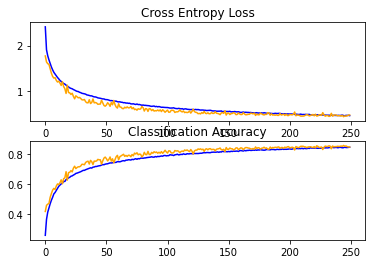

In [19]:
# learning curves
summarize_diagnostics(history)

In [20]:
import pandas as pd
model.save(r'/content/drive/MyDrive/Data Project/model', save_format='h5')
pd.DataFrame(history.history).to_csv('/content/drive/MyDrive/Data Project/model.csv')
 